<a href="https://colab.research.google.com/github/LatifahNursyabanu/Grafika-Komputer/blob/main/Drawing_line_algorithm_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt, pandas as pd

In [ ]:
def start_end(A, B):
    if A[0] > B[0]:
        return B,A
    return A,B

def inputpoint(name = "A"):
    while True:
      try:
        point = input('Input point ' + name + '(x,y): ').split(',')
        x = int(point[0])
        y = int(point[1])
        return [x, y]
      except:
        print('Error!')

def rounding(x):
  if x > int(x) + 0.5:
    return int(x) + 1
  return int(x)

def plot_garis(AB,BC,CD):
    plt.plot([AB['x'][0], AB['x'][-1]], [AB['y'][0], AB['y'][-1]], label = 'garis AB', color = 'red')
    plt.scatter(AB['x'], AB['y'], color = 'red')
    plt.plot(AB['x'], AB['y'], color = 'purple')

    plt.plot([BC['x'][0], BC['x'][-1]], [BC['y'][0], BC['y'][-1]], label = 'garis BC', color = 'black')
    plt.scatter(BC['x'], BC['y'], color = 'black')
    plt.plot(BC['x'], BC['y'], color = 'green')

    plt.plot([CD['x'][0], CD['x'][-1]], [CD['y'][0], CD['y'][-1]], label = 'garis CD', color = 'green')
    plt.scatter(CD['x'], CD['y'], color = 'green')
    plt.plot(CD['x'], CD['y'], color = 'black')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
titikA = inputpoint("A")
titikB = inputpoint("B")
titikC = inputpoint("C")
titikD = inputpoint("D")
print('\n')
A, B, C, D = titikA, titikB, titikC, titikD

Input point A(x,y): 10,11
Input point B(x,y): 12,13
Input point C(x,y): 13,14
Input point D(x,y): 14,15




#Algoritma DDA

Digital Differential Analyzer (DDA) merupakan salah satu algoritma yang dapat digunakan dalam membuat garis di komputer dengan prinsip y = mx + c untuk mencari nilai x increment dan y increment.
Kelemahan:
1. Setelah dilakukan rounding, garisnya menjadi tidak mulus
2. Waktu running lebih lama karena ada floating point

Catatan : floating point terjadi saat mencari step sehingga perlu di rounding

In [ ]:
def DDA(A,B):
  (x1,y1),(x2,y2) = start_end(A,B)
  coortitik = {
        'x' : [int(x1)],
        'y' : [int(y1)]
    }
  dx = x2-x1
  dy = y2-y1
  m = dy/dx

  if abs(dx)>abs(dy):
    steps = abs(dx)
  elif abs(dx)<abs(dy):
    steps = abs(dy)
  elif abs(dx)==abs(dy)!=0:
    steps = abs(dx)
  else:
    print('error!')

  xinc = dx/steps
  yinc = dy/steps

  i = 0
  xcoordinate =[]
  ycoordinate =[]

  while i<steps:
    i+=1
    x1 = round(x1+xinc)
    y1 = round(y1+yinc)
    coortitik['x'].append(x1)
    coortitik['y'].append(y1)
    if x1 == x2 and y1 == y2:
        break

  return coortitik

    0   1   2
x  10  11  12
y  11  12  13 

    0   1
x  12  13
y  13  14 

    0   1
x  13  14
y  14  15 



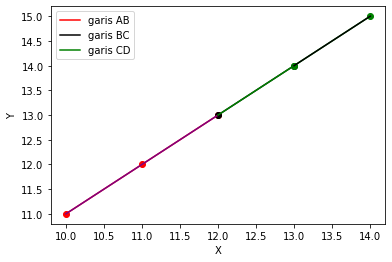

In [ ]:
AB = DDA(A, B)
BC = DDA(B, C)
CD = DDA(C, D)
print(pd.DataFrame(AB).T,'\n')
print(pd.DataFrame(BC).T,'\n')
print(pd.DataFrame(CD).T,'\n')

garis = [AB, BC, CD]
plot_garis(AB, BC, CD)

#Algoritma Brute Force

In [ ]:
def BF(t1,t2):
  (x1, y1),(x2, y2) = start_end(A,B)
  coortitik1 = {
        'x' : [int(x1)],
        'y' : [int(y1)]
    }

  if x1 == x2:
    x1 = x1
    y1 += y1
  elif y1 == y2:
    x1 += 1
    y1 = y1
  else:
    x, y = x1, y1

  dx = (x2) - (x1)
  dy = (y2) - (y1)
  N = x2-x1+1 
  m = dy/dx
  
  for i in range(N):
    y = m*(x-x1)+y1
    y = round(y)
    coortitik1['x'].append(x)
    coortitik1['y'].append(y)
    x += 1
    i += 1
  return coortitik1
  


     0   1   2   3
x  10  10  11  12
y  11  11  12  13 

    0   1   2   3
x  10  10  11  12
y  11  11  12  13 

    0   1   2   3
x  10  10  11  12
y  11  11  12  13 



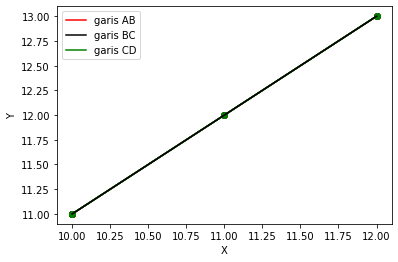

In [ ]:
AB = BF(A, B)
BC = BF(B, C)
CD = BF(C, D)
print('\n',pd.DataFrame(AB).T,'\n')
print(pd.DataFrame(BC).T,'\n')
print(pd.DataFrame(CD).T,'\n')

garis = [AB, BC, CD]
plot_garis(AB, BC, CD)

#Algoritma Bressenham

In [ ]:
def bres(t1,t2):
  (x1,y1),(x2,y2)= start_end(A,B)
  coortitik2 = {
      'x' : [int(x1)],
      'y' : [int(y1)]
  }
  dx = x2-x1
  dy = y2-y1
  m = dy/(dx)

  if m > 1:
    p = 2*(dx-dy)
  else:
    p = 2*(dy-dx)
  
  while True:
    if m < -1:
      if p<0:
        y1 -= 1
        p += 2*dx
      else:
        x1 += 1
        y1 -= 1
        p += 2*(dx-dy)

    elif m > 0 and m < 1:
      if p<0:
        x1 += 1
        p += 2*dy
      else:
        x1 += 1
        y1 += 1
        p += 2*(dy-dx)

    elif m > -1 and m < 0:
      if pk < 0:
        x1 += 1
        p += 2*dy
      else:
        x1 += 1
        y1 -= 1
        p += 2*(dy-dx)
  
    elif m > 1:
      if pk < 0:
        y1 += 1
        p += 2*dx
      else:
        x1 += 1
        y1 += 1
        p += 2*(dx-dy)

    coortitik2['x'].append(x1)
    coortitik2['y'].append(y1)

    if m <= 0:
      if x1 >= x2 and y1 <= y2:
        break
    elif m > 0:
      if x1 >= x2 and y1 >= y2:
        break
  return coortitik2

In [ ]:
AB = bres(A, B)
BC = bres(B, C)
CD = bres(C, D)
print('\n',pd.DataFrame(AB).T,'\n')
print(pd.DataFrame(BC).T,'\n')
print(pd.DataFrame(CD).T,'\n')

garis = [AB, BC, CD]
plot_garis(AB, BC, CD)

#Thank you
enable to open discussion! contact me https://www.linkedin.com/in/latifah-nursya-banu
*u can do ur own research and experiment to get more insight*
